In [2]:
import matplotlib.pyplot as plt
import json
import h5py
import seaborn as sns

sns.set_style('white')
# style.use('whitegrid')
sns.set(font_scale=2.0, style="white", rc={"lines.linewidth": 4.0})

In [3]:
with open("../results/exp_cifar/12/config.json") as f:
    res = json.load(f)
res["weight_scale"]

FileNotFoundError: [Errno 2] No such file or directory: '../results/exp_cifar/12/config.json'

In [ ]:
with open("../results/exp_cifar/12/run.json") as f:
    res = json.load(f)
res["result"]

In [2]:
!ls /scratch/wjm363/bnn_priors/softmax_temp*

/scratch/wjm363/bnn_priors/softmax_temp_crops:
1   12	15  18	20  23	26  29	31  34	37  4	42  45	48  50	8
10  13	16  19	21  24	27  3	32  35	38  40	43  46	49  6	9
11  14	17  2	22  25	28  30	33  36	39  41	44  47	5   7	_sources

/scratch/wjm363/bnn_priors/softmax_temp_flips:
1   14	19  23	28  32	37  41	46  50	55  6	64  69	73  _sources
10  15	2   24	29  33	38  42	47  51	56  60	65  7	74
11  16	20  25	3   34	39  43	48  52	57  61	66  70	75
12  17	21  26	30  35	4   44	49  53	58  62	67  71	8
13  18	22  27	31  36	40  45	5   54	59  63	68  72	9

/scratch/wjm363/bnn_priors/softmax_temp_scaling:
1   14	19  23	28  32	37  41	46  50	55  6	64  69	73  _sources
10  15	2   24	29  33	38  42	47  51	56  60	65  7	74
11  16	20  25	3   34	39  43	48  52	57  61	66  70	75
12  17	21  26	30  35	4   44	49  53	58  62	67  71	8
13  18	22  27	31  36	40  45	5   54	59  63	68  72	9

/scratch/wjm363/bnn_priors/softmax_temp_testing:
1  10  2  3  4	5  6  7  8  9  _sources


In [5]:
scale = []
result = []
for i in range(24):
    dir_name = "../results/exp_cifar/" + str(i) + "/"
    print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        print(res1["weight_scale"], res2["result"])
        if res2["result"] is not None:
            scale.append(res1["weight_scale"])
            result.append(res2["result"])
    except:
        print(i, "not found")

../results/exp_cifar/0/config.json
0 not found
../results/exp_cifar/1/config.json
1.41 None
../results/exp_cifar/2/config.json
1.41 None
../results/exp_cifar/3/config.json
1.41 None
../results/exp_cifar/4/config.json
1.41 None
../results/exp_cifar/5/config.json
1.41 None
../results/exp_cifar/6/config.json
1.41 None
../results/exp_cifar/7/config.json
1.41 None
../results/exp_cifar/8/config.json
1.41 None
../results/exp_cifar/9/config.json
1.41 None
../results/exp_cifar/10/config.json
0.41 {'acc_ensemble': 0.8816999793052673, 'acc_last': 0.8485999703407288, 'lp_ensemble': -0.3571572552713611, 'lp_last': -0.44842723574638366}
../results/exp_cifar/11/config.json
0.141 {'acc_ensemble': 0.8784999847412109, 'acc_last': 0.8472999930381775, 'lp_ensemble': -0.3750242863701093, 'lp_last': -0.4499020259618759}
../results/exp_cifar/12/config.json
1.41 {'acc_ensemble': 0.8772000074386597, 'acc_last': 0.8486999869346619, 'lp_ensemble': -0.36489269200507224, 'lp_last': -0.4686381016254425}
../results/

(0.1, 0.25)

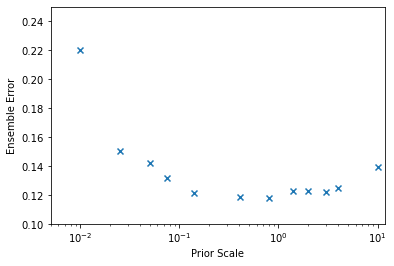

In [6]:
plt.scatter(scale, [1 - x["acc_ensemble"] for x in result], marker = "x")
plt.xlabel("Prior Scale")
plt.ylabel("Ensemble Error")
plt.semilogx()
plt.xlim((0.005, 12))
plt.ylim((0.1, 0.25))

(-0.75, -0.3)

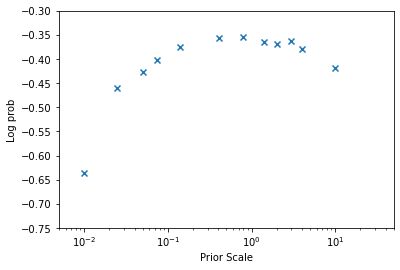

In [7]:
plt.scatter(scale, [x["lp_ensemble"] for x in result], marker = "x")
plt.xlabel("Prior Scale")
plt.ylabel("Log prob")
plt.semilogx()
plt.xlim((0.005, 50))
plt.ylim((-0.75, -0.3))

In [8]:
!ls ../results/exp_cifar_temp/

1  2  3  4  5  6  7  _sources


In [9]:
scale = []
result = []
for i in range(8):
    dir_name = "../results/exp_cifar_temp/" + str(i) + "/"
    print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        print(res1["softmax_temp"], res2["result"])
        if res2["result"] is not None:
            scale.append(res1["softmax_temp"])
            result.append(res2["result"])
    except:
        print(i, "not found")

../results/exp_cifar_temp/0/config.json
0 not found
../results/exp_cifar_temp/1/config.json
1.0 None
../results/exp_cifar_temp/2/config.json
0.1 {'acc_ensemble': 0.8669000267982483, 'acc_last': 0.8361999988555908, 'lp_ensemble': -0.3951405788084984, 'lp_last': -0.49657401452064515}
../results/exp_cifar_temp/3/config.json
0.001 {'acc_ensemble': 0.09960000216960907, 'acc_last': 0.10000000149011612, 'lp_ensemble': -2.302589203889244, 'lp_last': -2.3026451110839843}
../results/exp_cifar_temp/4/config.json
0.01 {'acc_ensemble': 0.8468000292778015, 'acc_last': 0.826200008392334, 'lp_ensemble': -0.616653142739195, 'lp_last': -0.5335106459948235}
../results/exp_cifar_temp/5/config.json
0.05 {'acc_ensemble': 0.8755999803543091, 'acc_last': 0.8478000164031982, 'lp_ensemble': -0.3841644926053323, 'lp_last': -0.47876692475676536}
../results/exp_cifar_temp/6/config.json
1.0 {'acc_ensemble': 0.8774999976158142, 'acc_last': 0.8445000052452087, 'lp_ensemble': -0.36401285179479287, 'lp_last': -0.479674

(0.1, 0.16)

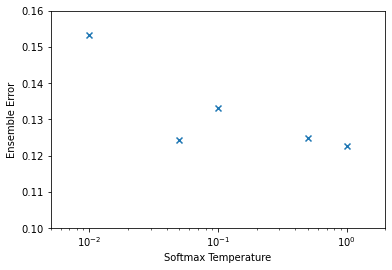

In [15]:
plt.scatter(scale, [1 - x["acc_ensemble"] for x in result], marker = "x")
plt.xlabel("Softmax Temperature")
plt.ylabel("Ensemble Error")
plt.semilogx()
plt.xlim((0.005, 2))
plt.ylim((0.1, 0.16))

(-0.75, -0.25)

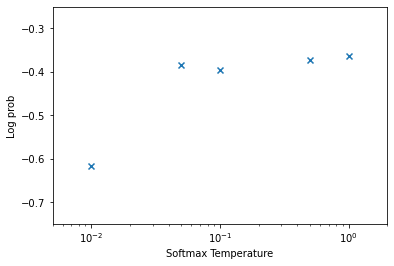

In [18]:
plt.scatter(scale, [x["lp_ensemble"] for x in result], marker = "x")
plt.xlabel("Softmax Temperature")
plt.ylabel("Log prob")
plt.semilogx()
plt.xlim((0.005, 2))
plt.ylim((-0.75, -0.25))

In [4]:
scale = []
result = []
for i in range(75):
    dir_name = "/scratch/wjm363/bnn_priors/softmax_temp_flips/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        # print(res1["data"])
        if res1['data'] == 'cifar10_flips':
            # print(res1["softmax_temp"], res2["result"])
            if res2["result"] is not None:
                scale.append(res1["softmax_temp"])
                result.append(res2["result"])
    except:
        print(i, "not found")

0 not found


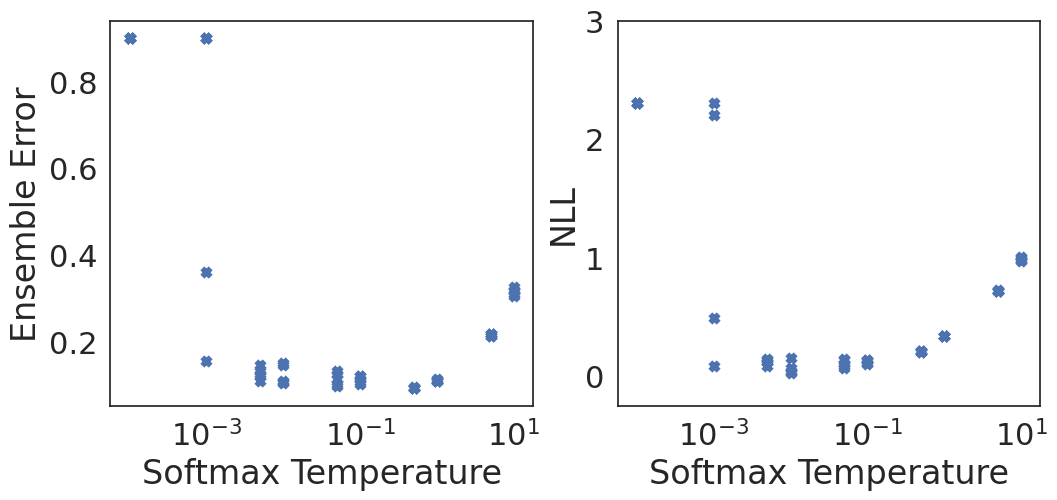

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].scatter(scale, [1 - x["acc_ensemble"] for x in result], marker = "x")
ax[0].set_xlabel("Softmax Temperature")
ax[0].set_ylabel("Ensemble Error")
ax[0].semilogx()
# plt.xlim((0.005, 12))
# ax[0].set_ylim((0.07, 0.2))

ax[1].scatter(scale, [-x["lp_ensemble"]*scale[i] for i, x in enumerate(result)], marker = "x")
ax[1].set_xlabel("Softmax Temperature")
ax[1].set_ylabel("NLL")
ax[1].semilogx()
# plt.xlim((0.005, 12))
ax[1].set_ylim((-0.25, 3))

plt.show()

In [6]:
scale2 = []
result2 = []
for i in range(51):
    dir_name = "/scratch/wjm363/bnn_priors/softmax_temp_crops/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        # print(res1["data"])
        if res1['data'] == 'cifar10_crops':
            # print(res1["softmax_temp"], res2["result"])
            if res2["result"] is not None:
                scale2.append(res1["softmax_temp"])
                result2.append(res2["result"])
    except:
        print(i, "not found")

0 not found


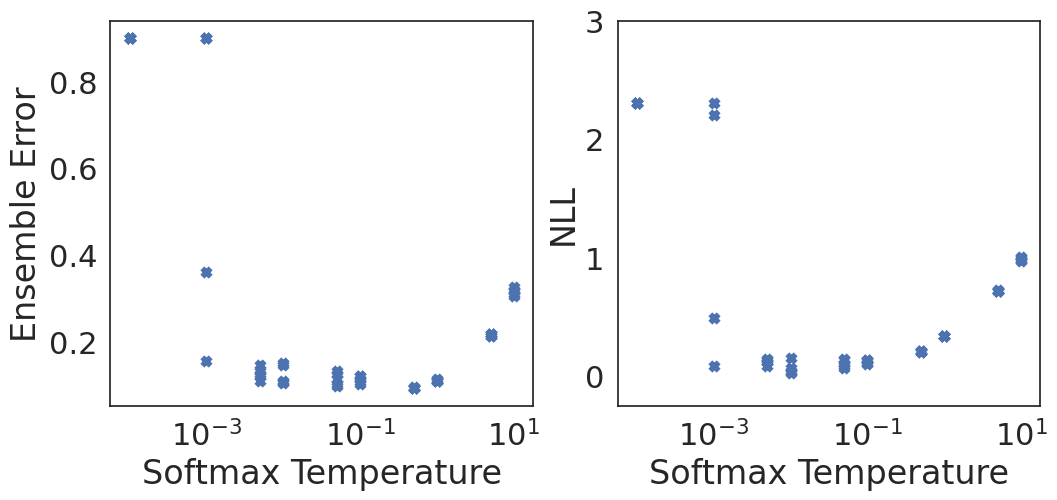

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].scatter(scale, [1 - x["acc_ensemble"] for x in result], marker = "x")
ax[0].set_xlabel("Softmax Temperature")
ax[0].set_ylabel("Ensemble Error")
ax[0].semilogx()
# plt.xlim((0.005, 12))
# ax[0].set_ylim((0.07, 0.2))

ax[1].scatter(scale, [-x["lp_ensemble"]*scale[i] for i, x in enumerate(result)], marker = "x")
ax[1].set_xlabel("Softmax Temperature")
ax[1].set_ylabel("NLL")
ax[1].semilogx()
# plt.xlim((0.005, 12))
ax[1].set_ylim((-0.25, 3))

plt.show()

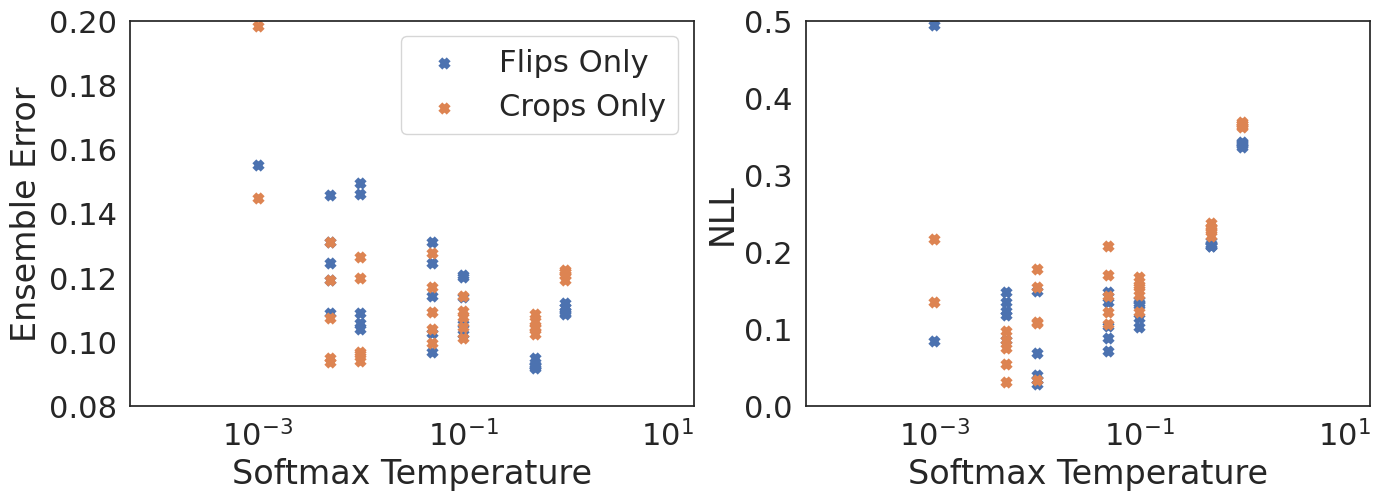

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax[0].scatter(scale, [1 - x["acc_ensemble"] for x in result], marker = "x", label = "Flips Only")
ax[0].set_xlabel("Softmax Temperature")
ax[0].set_ylabel("Ensemble Error")
ax[0].semilogx()
# plt.xlim((0.005, 12))
# ax[0].set_ylim((0.07, 0.2))

ax[1].scatter(scale, [-x["lp_ensemble"]*scale[i] for i, x in enumerate(result)], marker = "x")
ax[1].set_xlabel("Softmax Temperature")
ax[1].set_ylabel("NLL")
ax[1].semilogx()


ax[0].scatter(scale2, [1 - x["acc_ensemble"] for x in result2], marker = "x", label = "Crops Only")

ax[1].scatter(scale2, [-x["lp_ensemble"]*scale2[i] for i, x in enumerate(result2)], marker = "x", label = "Crops Only")

ax[0].set_ylim((0.08, 0.2))
ax[1].set_ylim((0.0, 0.5))

ax[0].legend()
plt.show()

In [9]:
!ls /scratch/wjm363/bnn_priors/softmax_temp_scaling

1   14	19  23	28  32	37  41	46  50	55  6	64  69	73  _sources
10  15	2   24	29  33	38  42	47  51	56  60	65  7	74
11  16	20  25	3   34	39  43	48  52	57  61	66  70	75
12  17	21  26	30  35	4   44	49  53	58  62	67  71	8
13  18	22  27	31  36	40  45	5   54	59  63	68  72	9


In [10]:
scale3 = []
result3 = []
for i in range(76):
    dir_name = "/scratch/wjm363/bnn_priors/softmax_temp_scaling/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        if res1['data'] == 'cifar10_augmented':
            # print(res1["softmax_temp"], res2["result"])
            if res2["result"] is not None:
                scale3.append(res1["softmax_temp"])
                result3.append(res2["result"])
            else:
                print(i, "not completed?")
    except:
        print(i, "not found")

0 not found
26 not completed?
27 not completed?
28 not completed?
29 not completed?
30 not completed?
31 not completed?
32 not completed?
33 not completed?
34 not completed?
35 not completed?
36 not completed?
37 not completed?
38 not completed?
39 not completed?
42 not completed?
43 not completed?
44 not completed?
45 not completed?
46 not completed?
47 not completed?
48 not completed?
49 not completed?
50 not completed?
63 not completed?


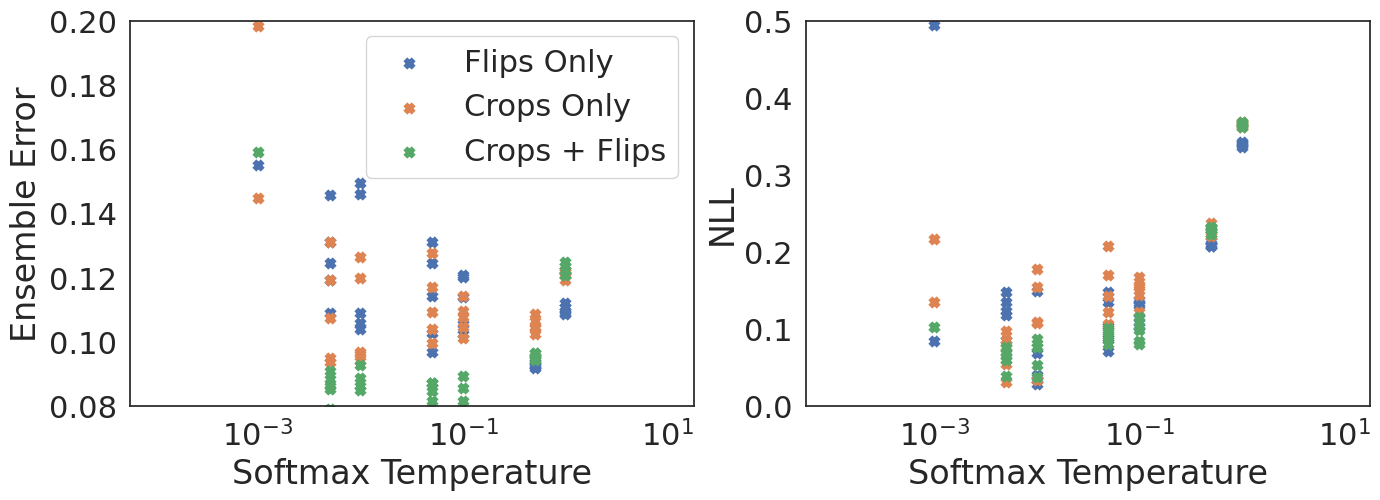

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax[0].scatter(scale, [1 - x["acc_ensemble"] for x in result], marker = "x", label = "Flips Only")
ax[0].set_xlabel("Softmax Temperature")
ax[0].set_ylabel("Ensemble Error")
ax[0].semilogx()

ax[1].scatter(scale, [-x["lp_ensemble"]*scale[i] for i, x in enumerate(result)], marker = "x")
ax[1].set_xlabel("Softmax Temperature")
ax[1].set_ylabel("NLL")
ax[1].semilogx()


ax[0].scatter(scale2, [1 - x["acc_ensemble"] for x in result2], marker = "x", label = "Crops Only")

ax[1].scatter(scale2, [-x["lp_ensemble"]*scale2[i] for i, x in enumerate(result2)], marker = "x", label = "Crops Only")
ax[0].scatter(scale3, [1 - x["acc_ensemble"] for x in result3], marker = "x", label = "Crops + Flips")

ax[1].scatter(scale3, [-x["lp_ensemble"]*scale3[i] for i, x in enumerate(result3)], marker = "x", label = "Crops + Flips")

ax[0].set_ylim((0.08, 0.2))
ax[1].set_ylim((0.0, 0.5))

ax[0].legend()
plt.show()

In [12]:
import numpy as np
import pandas as pd

In [13]:
flips = pd.DataFrame(result)
crops = pd.DataFrame(result2)
fullaug = pd.DataFrame(result3)

flips["stemp"] = scale
crops["stemp"] = scale2
fullaug["stemp"] = scale3

flips["lp_ens"] = flips["stemp"] * flips["lp_ensemble"]
crops["lp_ens"] = crops["stemp"] * crops["lp_ensemble"]
fullaug["lp_ens"] = fullaug["stemp"] * fullaug["lp_ensemble"]

flips = flips.groupby("stemp")
crops = crops.groupby("stemp")
fullaug = fullaug.groupby("stemp")

In [14]:
crops

In [15]:
flips_acc = flips["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
crops_acc = crops["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
fullaug_acc = fullaug["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

In [16]:
flips_nll = flips["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
crops_nll = crops["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
fullaug_nll = fullaug["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

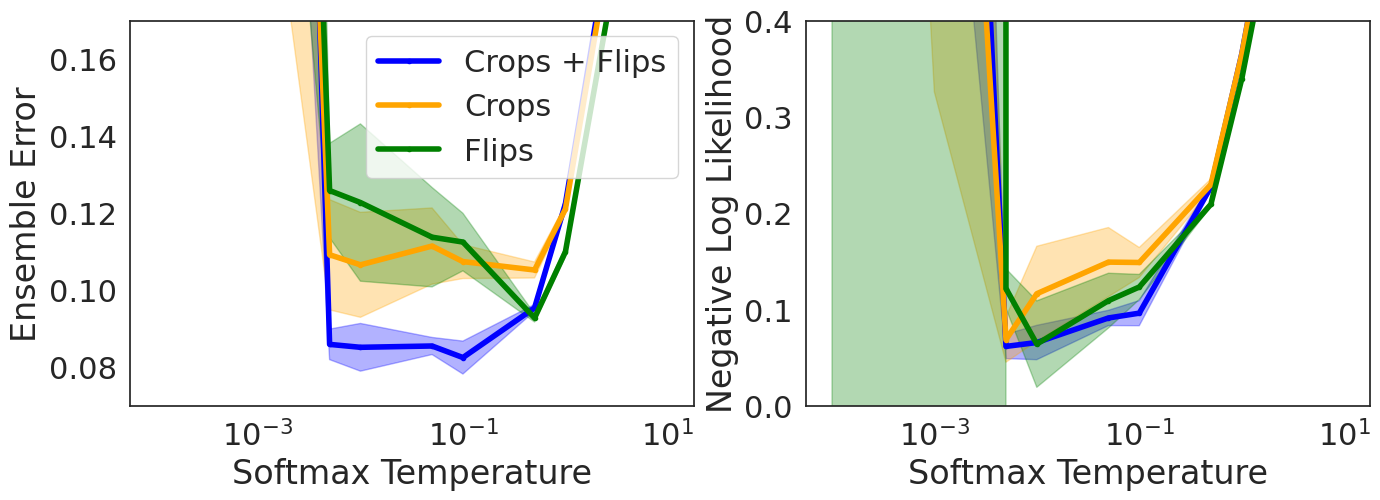

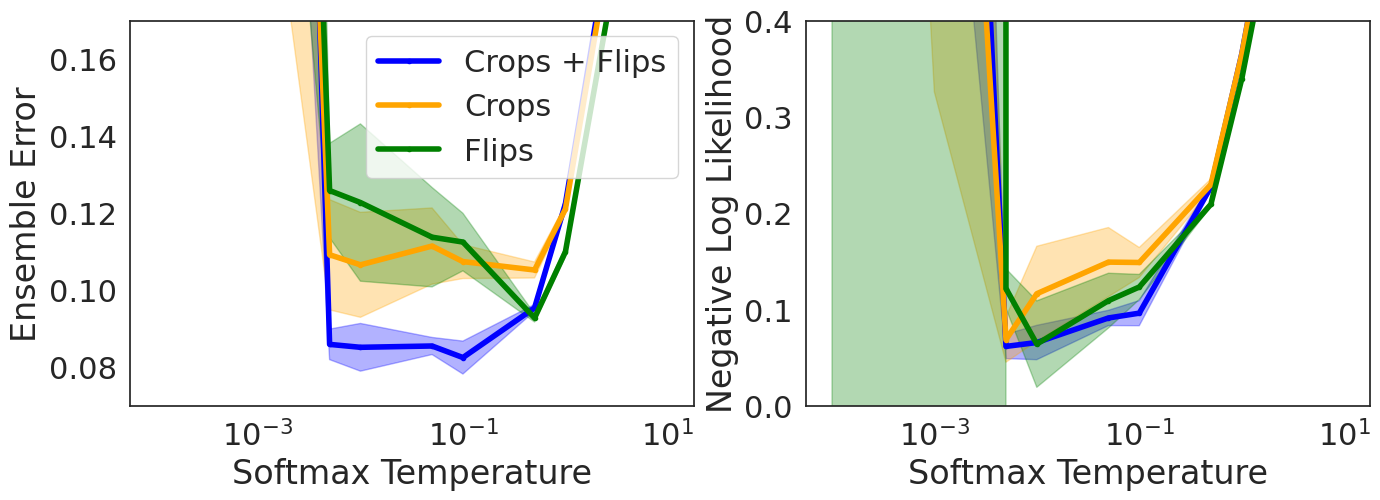

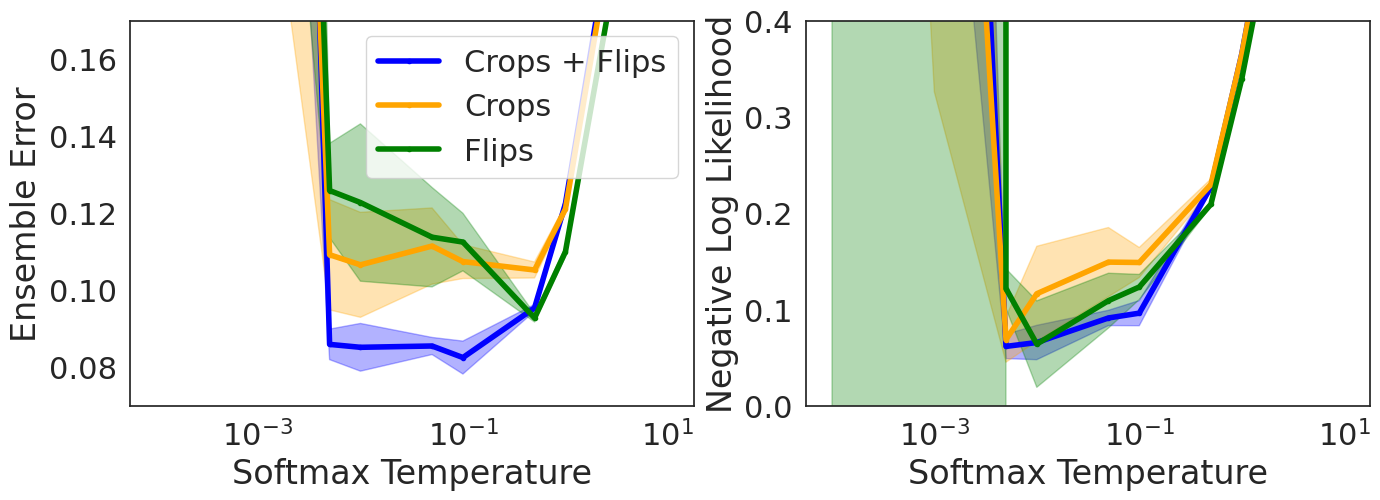

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].plot(fullaug_acc["stemp"], 1 - fullaug_acc["mean"], marker = ".", color = "blue", label = "Crops + Flips")
ax[0].fill_between(fullaug_acc["stemp"], 1 - fullaug_acc["mean"] - 2 * fullaug_acc["std"] / (5**0.5), 
                   1 - fullaug_acc["mean"] + 2 * fullaug_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

ax[0].plot(crops_acc["stemp"], 1 - crops_acc["mean"], marker = ".", color = "orange", label = "Crops")
ax[0].fill_between(crops_acc["stemp"], 1 - crops_acc["mean"] - 2 * crops_acc["std"] / (5**0.5), 
                   1 - crops_acc["mean"] + 2 * crops_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "orange")

ax[0].plot(flips_acc["stemp"], 1 - flips_acc["mean"], marker = ".", color = "green", label = "Flips")
ax[0].fill_between(flips_acc["stemp"], 1 - flips_acc["mean"] - 2 * flips_acc["std"] / (5**0.5), 
                   1 - flips_acc["mean"] + 2 * flips_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "green")

ax[1].plot(fullaug_nll["stemp"], -fullaug_nll["mean"], marker = ".", color = "blue")
ax[1].fill_between(fullaug_nll["stemp"], - fullaug_nll["mean"] - 2 * fullaug_nll["std"] / (5**0.5), 
               - fullaug_nll["mean"] + 2 * fullaug_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

ax[1].plot(crops_nll["stemp"], - crops_nll["mean"], marker = ".", color = "orange")
ax[1].fill_between(crops_nll["stemp"], - crops_nll["mean"] - 2 * crops_nll["std"] / (5**0.5), 
                   - crops_nll["mean"] + 2 * crops_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "orange")

ax[1].plot(flips_nll["stemp"], - flips_nll["mean"], marker = ".", color = "green")
ax[1].fill_between(flips_nll["stemp"], - flips_nll["mean"] - 2 * flips_nll["std"] / (5**0.5), 
                   - flips_nll["mean"] + 2 * flips_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "green")

ax[1].semilogx()
ax[0].semilogx()
ax[0].set_ylim((0.07, 0.17))
ax[1].set_ylim((0.0, 0.4))

ax[0].set_xlabel("Softmax Temperature")
ax[1].set_xlabel("Softmax Temperature")

ax[0].set_ylabel("Ensemble Error")
ax[1].set_ylabel("Negative Log Likelihood")

ax[0].legend()
# plt.savefig("dataaug_counts.pdf", bbox_inches = "tight")
plt.show()

In [102]:
fullaug_nll

,stemp,level_1,mean,std
0,0.0001,0,-2.301718,0.000818
1,0.0010,0,-1.630257,0.893574
2,0.0050,0,-0.061657,0.014200
3,0.0100,0,-0.065705,0.019947
4,0.0500,0,-0.091211,0.008872
5,0.1000,0,-0.083530,NaN
6,5.0000,0,-0.766993,0.000105
